In [1]:
from pathlib import Path

import tqdm
import numpy as np
import matplotlib.pyplot as plt

from utils import create_shape, calculate_sdf, plot_shape, plot_sdf, get_prototype_shape


In [2]:
data_dir = './data/train'
num_freq = 12
w_range = (-.5, .5)
base_r = 7
ellipsis_ratio = 2.
sdf_resolution = 500

max_radius = max(ellipsis_ratio, 1 / ellipsis_ratio) * (max(map(abs, w_range)) * num_freq + base_r)
data_dir = Path(data_dir)


In [ ]:
sdf_paths = sorted((data_dir / 'sdf').iterdir(), key=lambda x: int(x.stem))
shape_paths = sorted((data_dir / 'shape').iterdir(), key=lambda x: int(x.stem))

sdfs = list()
shapes = list()
for sdf_path, shape_path in zip(sdf_paths, shape_paths):
    sdf = np.load(sdf_path)
    sdfs.append(sdf)
    shape = np.load(shape_path)
    shapes.append(shape)
sdfs = np.stack(sdfs)


100%|██████████| 200/200 [00:00<00:00, 423.76it/s]


In [4]:
p_shape = get_prototype_shape(sdfs, sdf_resolution=sdf_resolution, max_radius=max_radius)

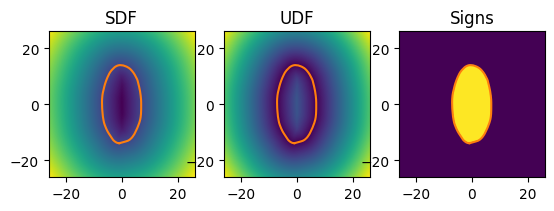

In [5]:
prototype_sdf, prototype_udf, prototype_signs = calculate_sdf(p_shape, sdf_resolution, max_radius=max_radius)
plot_sdf(prototype_sdf, prototype_udf, prototype_signs, p_shape, max_radius=max_radius)
plt.show()
